In [14]:
# conda install netCDF4

In [25]:
# conda install -c conda-forge xarray dask bottleneck

In [26]:
# conda update -n base -c conda-forge conda

In [1]:
import pandas as pd
import numpy as np

import netCDF4 as nc
import xarray as xr

### netCDF4

Following is inspired by https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648

In [2]:
# Reading in with netCDF4:
fn = './data/ml_hfi_v1_2000.nc'
ds = nc.Dataset(fn)

In [3]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(13141), lon(36390)
    variables(dimensions): float64 lat(lat), float64 lon(lon), float64 __xarray_dataarray_variable__(lat, lon)
    groups: 


In [4]:
print(ds.data_model)

NETCDF4


In [5]:
print(ds.__dict__)

{}


In [6]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 13141
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 36390


In [7]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
unlimited dimensions: 
current shape = (13141,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
unlimited dimensions: 
current shape = (36390,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 __xarray_dataarray_variable__(lat, lon)
    _FillValue: nan
unlimited dimensions: 
current shape = (13141, 36390)
filling on


In [8]:
# additional netCDF4 info at http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html

### Xarray

from https://stackoverflow.com/questions/66169106/transform-part-of-a-netcdf-file-into-a-dataframe-with-xarray:

In [9]:
dp = xr.open_dataset('./data/ml_hfi_v1_2000.nc')

m2 = dp.to_dataframe()
m2 = m2.dropna().reset_index()
print(m2.head(15))

          lat        lon  __xarray_dataarray_variable__
0  -55.609663 -68.108226                   3.328762e-06
1  -55.609663 -68.098333                   1.328018e-08
2  -55.609663 -68.088440                   1.276196e-13
3  -55.609663 -68.078547                   7.129802e-14
4  -55.609663 -68.068655                   6.915253e-18
5  -55.609663 -68.058762                   8.362481e-10
6  -55.609663 -68.048869                   4.444112e-13
7  -55.609663 -68.038976                   6.182441e-06
8  -55.609663 -68.029084                   7.117076e-07
9  -55.599770 -68.226938                   3.421031e-08
10 -55.599770 -68.217046                   4.486133e-09
11 -55.599770 -68.207153                   6.264514e-09
12 -55.599770 -68.197260                   5.907112e-08
13 -55.599770 -68.187367                   1.511353e-05
14 -55.599770 -68.118118                   5.960242e-10


In [10]:
m2.tail()

,lat,lon,__xarray_dataarray_variable__
140472840,69.988495,171.830159,1.399456e-07
140472841,69.988495,171.840051,2.790310e-04
140472842,69.988495,171.849944,3.740434e-05
140472843,69.988495,171.859837,4.128010e-02
140472844,69.988495,171.869730,8.492768e-04


In [11]:
# Trimming data for just CO latitudes
co_coords = m2[(m2.lat <= 41) & (m2.lat >= 37)].copy()

In [12]:
co_coords.head()

,lat,lon,__xarray_dataarray_variable__
73052098,37.006118,-122.172020,0.527928
73052099,37.006118,-122.162127,0.323778
73052100,37.006118,-122.152235,0.352339
73052101,37.006118,-122.142342,0.182623
73052102,37.006118,-122.132449,0.152508


In [13]:
# And further subsetting for just CO longitudes:
co_coords = co_coords[(co_coords.lon <= 109) & (co_coords.lon >= 102)]

In [14]:
# Confirming we have only the range for CO:
co_coords.describe()

,lat,lon,__xarray_dataarray_variable__
count,285623.000000,285623.000000,2.856230e+05
mean,38.999493,105.499354,1.522127e-01
std,1.153732,2.019027,1.411210e-01
min,37.006118,102.007238,1.323955e-17
25%,38.000338,103.748359,1.960994e-02
50%,38.994557,105.499373,1.337140e-01
75%,39.993724,107.250387,2.272051e-01
max,40.992890,108.991509,9.081439e-01


In [15]:
co_coords.shape

(285623, 3)

### Image data:

Inspiration from - https://github.com/sarasafavi/remote-sensing-with-python

In [13]:
import rasterio

In [14]:
image_file = "./data/Hansen_GFC-2019-v1.7_first_40N_110W.tif"

satdat = rasterio.open(image_file)

In [15]:
# satdat is our open dataset object
print(satdat)

# let's look at some basic information about this geoTIFF:

# dataset name
print(satdat.name)

# number of bands in this dataset
print(satdat.count)

<open DatasetReader name='./data/Hansen_GFC-2019-v1.7_first_40N_110W.tif' mode='r'>
./data/Hansen_GFC-2019-v1.7_first_40N_110W.tif
4


In [16]:
# The dataset reports a band count.
print(satdat.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat.indexes)

4
(1, 2, 3, 4)


In [17]:
# Landsat 4-band band order from Global Forest Change dataset
# https://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.7.html:

red, nir, swir5, swir7 = satdat.read()

In [18]:
print(red.dtype)

uint8


In [29]:
type(red)

numpy.ndarray

In [19]:
# using the red band as an example, examine the width & height of the image (in pixels)

w = red.shape[0]
h = red.shape[1]

print("width: {w}, height: {h}".format(w=w, h=h))

width: 40000, height: 40000


In [20]:
# Minimum bounding box in projected units

print(satdat.bounds)

BoundingBox(left=-110.0, bottom=30.0, right=-100.0, top=40.0)


In [21]:
# Get dimensions, in map units (this is in latitude and longitude)

width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 10.0, Height: 10.0


In [23]:
# Number of rows and columns.

print("Rows: {}, Columns: {}".format(satdat.height, satdat.width))

Rows: 40000, Columns: 40000


In [24]:
# Get coordinate reference system

satdat.crs

CRS.from_epsg(4326)

In [25]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# the dataset's profile:

satdat.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, -110.0,
       0.0, -0.00025, 40.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

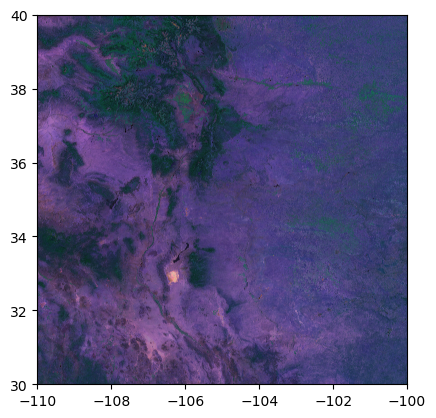

<AxesSubplot: >

In [27]:
from rasterio.plot import show
show(satdat)

In [31]:
# Output a min & max pixel value in each band.

for band in [red, nir, swir5, swir7]:
    print("min {min} max {max}".format(min=band.min(), max=band.max()))

min 0 max 255
min 0 max 245
min 0 max 255
min 0 max 255


In [32]:
import numpy as np

model_data = np.dstack((red, swir5, swir7))

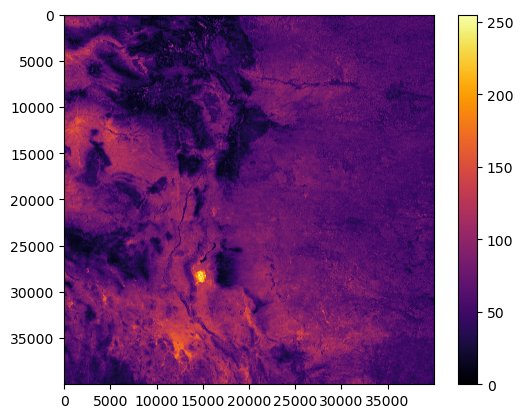

In [34]:
import matplotlib.pyplot as plt

fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()

## Modeling

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

2022-10-07 11:00:19.071520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import tensorflow as tf
tf.__version__

'2.10.0'

### Preprocessing

"The input into the CNN is an array with shape (120,120,3) representing 3 Landsat channels of 120 pixels x 120 pixels each. As a preprocessing step, the three Landsat input channels (band 3, band 5, band 7) are standardized, first dividing by 255 (to convert to values between 0 and 1), then subtracting (0.08,0.24,0.12) and dividing by (0.46,0.58,0.47). In this way, we obtain values that are centered around zero and extend to approximately plus/minus 1.0. Throughout our analysis, we noticed that the general “brightness” of the Landsat imagery can vary in space, and also between year 2000 and 2019 within the GFCv1.7 data. We add a random integer between (- 10,10) to each input channel prior to training to eliminate the tendency of the CNN to base its predictions too heavily on the magnitude of the input values. This step may be exceptionally important if one wishes to train and predict from various versions of the GFC Landsat imagery."

**Input data**

[X] divide each channel by 255

[ ] subtract 0.08, 0.24, 0.12 from channels for band 3, band 5, and band 7 respectively

[ ] divide by 0.46, 0.58, 0.47 from channels for band 3, band 5, and band 7 respectively

[ ] add random integer between -10 and 10 to each channel


**Training and Loss**

[ ] restrict training to a max of 40k pixels per 10 deg. by 10 deg box

[ ] enforce that no ml-HFI bin is represented by more than about 4,000 samples

[ ] perform data augmentation by rotating each image by 90 degrees 3 times to create 4 versions of each image

[ ] relabel samples with zero to having labels of -0.2 to encourage CNN to predict values of 0

[ ] use learning rate of 0.001 and batch size of 128

[ ] of 40,000 samples used, withold 750 for validation

[ ] halt training when validation MSE increases 3 epochs in a row, then restore the weights from best model for final CNN

In [ ]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
X_train = X_train / 255
X_test = X_test / 255

**Architecture from citation 1:**

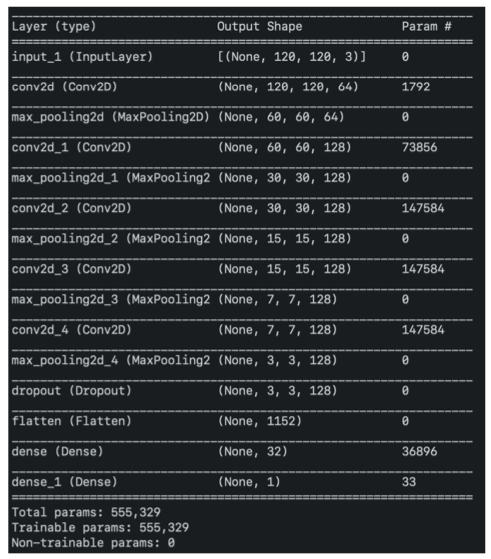

In [ ]:
# Instantiate CNN model
cnn_model = Sequential()

# 1 - Input layer??

# 2 - Add a convolutional layer #1
cnn_model.add(Conv2D(filters=64, 
                    kernel_size=(3,3), # this is the "filter size"
                     strides=2,
                     padding='valid',
                    activation='relu',
                    input_shape=(120,120,3)))

# 3 - Add Pooling layer #1
cnn_model.add(MaxPooling2D(
                    pool_size=(2,2), 
                    strides=2, 
                    padding='valid'))

# 4 - Add convolutional layer #3
cnn_model.add(Conv2D(filters=128, 
                    kernel_size=(3,3),
                     strides=2,
                     padding='valid',
                    activation='relu'))

# 5 - Add pooling layer #3
cnn_model.add(MaxPooling2D(
                    pool_size=(2,2), 
                    strides=2, 
                    padding='valid'))

# 6 - Add convolutional layer #4
cnn_model.add(Conv2D(filters=128, 
                    kernel_size=(3,3),
                     strides=2,
                     padding='valid',
                    activation='relu'))

# 7 - Add pooling layer #4
cnn_model.add(MaxPooling2D(
                    pool_size=(2,2), 
                    strides=2, 
                    padding='valid'))

# 8 - Add convolutional layer #5
cnn_model.add(Conv2D(filters=128, 
                    kernel_size=(3,3),
                     strides=2,
                     padding='valid',
                    activation='relu'))

# 9 - Add pooling layer #5
cnn_model.add(MaxPooling2D(
                    pool_size=(2,2), 
                    strides=2, 
                    padding='valid'))

# 10 - Add convolutional layer #5
cnn_model.add(Conv2D(filters=128, 
                    kernel_size=(3,3),
                     strides=2,
                     padding='valid',
                    activation='relu'))

# 11 - Add pooling layer #5
cnn_model.add(MaxPooling2D(
                    pool_size=(2,2), 
                    strides=2, 
                    padding='valid'))

# 12 - Dropout
cnn_model.add(Dropout(0.5))

# 13 - Flatten
cnn_model.add(Flatten())

# 14 - Dense 32
cnn_model.add(Dense(32, activation='relu'))

# 15 - Final Dense layer for output:
cnn_model.add(Dense(1, activation='sigmoid'))

**Citation**

(1) Keys, P. W., Barnes, E. A., & Carter, N. Dataset associated with "A machine-learning approach to human footprint index estimation with applications to sustainable development." Colorado State University. Libraries. http://dx.doi.org/10.25675/10217/216207